# **BIBLIOTECAS**

In [20]:
# Manipulação de Dados
import numpy as np  # Operações numéricas e matrizes
import pandas as pd  # Manipulação de DataFrames

# Visualização de Dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
import seaborn as sns  # Visualização de dados baseada em Matplotlib
import matplotlib.image as mpimg  # Manipulação de imagens

# Processamento de Texto
import re  # Expressões regulares para processamento de texto
from re import X  # Expressões regulares, flag de compilações de regex

# Modelagem e Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer  # Transformação de texto em vetores TF-IDF
from sklearn.model_selection import train_test_split  # Divisão de dados em treino e teste
from sklearn import metrics  # Métricas de avaliação de modelos
from sklearn import preprocessing  # Pré-processamento de dados
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Relatórios e métricas
from sklearn.metrics import precision_score, recall_score, f1_score  # Métricas de avaliação adicionais
from sklearn.preprocessing import StandardScaler  # Padronização de dados
from sklearn.feature_selection import mutual_info_classif  # Ganho de informação

#Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression  # Regressão logística
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier  # Árvore de Decisão
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.svm import SVC  # Máquina de vetores de suporte

# Outras Utilidades
import joblib  # Serialização de objetos Python
import statsmodels.api as sm  # Modelagem estatística
from IPython.display import Image  # Exibição de imagens no Jupyter Notebook
from scipy.sparse import hstack  # Manipulação de matrizes esparsas
import itertools  # Ferramentas para iterações
from tabulate import tabulate  # Formatação de tabelas

In [21]:
df = pd.read_csv('personality_dataset.csv')
df.dropna(inplace=True)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **BALANCEAMENTO**

In [22]:
total_extroversao = df[df['Personality'] == 'Extrovert']['Personality'].count()
total_introversao = df[df['Personality'] == 'Introvert']['Personality'].count()

prop_extroversao = total_extroversao / len(df)
prop_introversao = total_introversao / len(df)

print(f'Proporção de pessoas extrovertidas:{prop_extroversao:.2f}' )
print(f'Proporção de pessoas introvertidas: {prop_introversao:.2f}' )

limiar = 0.2  # Definir o limiar de desequilíbrio (por exemplo, 20%)
desbalanceado = abs(prop_extroversao - prop_introversao) > limiar

if desbalanceado:
    print('O dataset está desbalanceado.')
else:
    print('O dataset está balanceado.')


Proporção de pessoas extrovertidas:0.51
Proporção de pessoas introvertidas: 0.49
O dataset está balanceado.


# **FILTRAGEM DE DADOS**

In [23]:
# Contar valores nulos por coluna
nulos_por_coluna = df.isnull().sum()

#removendo valores nulos só por desencargo de consciência
df = df.dropna()

# Exibir os valores nulos por coluna
df.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [24]:
# Mudando os dados para valores numéricos(No = 0, Yes = 1)
df['Stage_fear'] = df['Stage_fear'].replace({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].replace({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].replace({'Extrovert': 1, 'Introvert': 0})

df.rename(columns={'Personality': 'label'}, inplace=True)

df.head()

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_17368\1002203776.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stage_fear'] = df['Stage_fear'].replace({'Yes': 1, 'No': 0})
C:\Users\PICHAU\AppData\Local\Temp\ipykernel_17368\1002203776.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Drained_after_socializing'] = df['Drained_after_socializing'].replace({'Yes': 1, 'No': 0})
C:\Users\PICHAU\AppData\Local\Temp\ipykernel_17368\1002203776.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,label
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


# **GANHO DE INFORMAÇÃO**

In [25]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [26]:
# Fixar a semente aleatória para reduzir a variação de resultados
np.random.seed(42)

# Dados de exemplo (substitua pelo seu DataFrame)
data = df

#features
features = [ 
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency',
]


#Label
y = data['label']

# Calcular o ganho de informação para cada feature
information_gains = {}
for feature in features:
    X = data[[feature]].to_numpy()
    information_gains[feature] = mutual_info_classif(X, y)[0]

# Ordenar as features pelo ganho de informação
sorted_features = sorted(information_gains.items(), key=lambda x: x[1], reverse=True)

# Separar os dados para o gráfico
features_sorted = [item[0] for item in sorted_features]
gains_sorted = [item[1] for item in sorted_features]

# Normalizar os ganhos de informação para o intervalo [0, 1]
gains_normalized = (gains_sorted - np.min(gains_sorted)) / (np.max(gains_sorted) - np.min(gains_sorted))

# Mapeamento dos valores normalizados para uma paleta de cores
colors = cm.magma(gains_normalized)  # Você pode usar outras paletas como cm.cool, cm.viridis, etc.




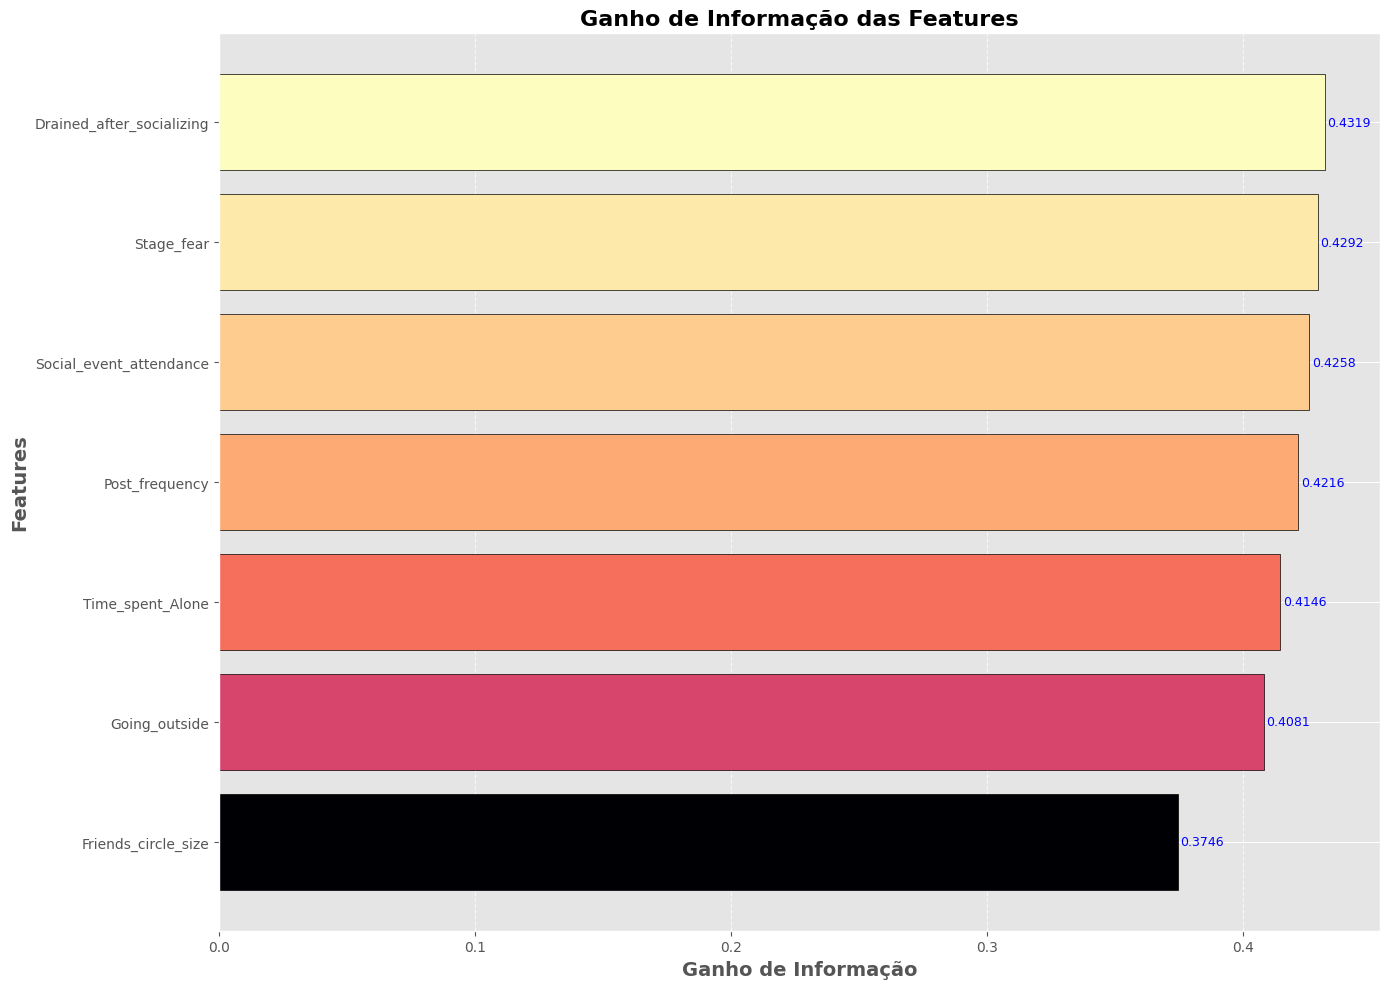

In [27]:
# Plotar o gráfico de barras
plt.figure(figsize=(14, 10))
bars = plt.barh(features_sorted, gains_sorted, color=colors, edgecolor='black')

# Adicionar valores às barras
for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center', ha='left', color='blue', fontsize=9)

# Estilo do gráfico
plt.style.use('ggplot')

# Configurar título e eixos com fonte Arial e negrito
title_font = { 'size':'16', 'weight':'bold'}
label_font = { 'size':'14', 'weight':'bold'}


# Configurar título e eixos
plt.title('Ganho de Informação das Features', **title_font)
plt.xlabel('Ganho de Informação', **label_font)
plt.ylabel('Features', **label_font)
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar a barra com maior ganho no topo

# Adicionar grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# **CRIAÇÃO DE FEATURES**


In [28]:
# Atualizar o valor de Y para usar a label
Y = df['label'].values

# Atualizar o valor de X para usar as novas features especificadas
X = df[['Stage_fear', 'Social_event_attendance',
        'Drained_after_socializing', 'Post_frequency']].values
print(X)



[[0. 4. 0. 5.]
 [1. 0. 1. 3.]
 [1. 1. 1. 2.]
 ...
 [0. 8. 0. 9.]
 [1. 1. 1. 0.]
 [0. 6. 0. 9.]]


In [29]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e ajustar o StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Padronizar os dados de treinamento e teste
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Instanciar modelos de classificação
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=600),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Armazenar resultados
results = []

# Treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    report_train = classification_report(y_train, y_pred_train, output_dict=True)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)

    results.append({
        'Modelo': name,
        'Acurácia Treino': accuracy_train,
        'Acurácia Teste': accuracy_test,
        **report_train['weighted avg'],
        **report_test['weighted avg']
    })

# Criar DataFrame com os resultados
df_results = pd.DataFrame(results)

# Ordenar DataFrame pela métrica de interesse (por exemplo, Acurácia Teste)
df_results_sorted = df_results.sort_values(by='Acurácia Teste', ascending=False)

# Definir uma função para aplicar formatação condicional e alinhamento à esquerda às células
def style_format(val):
    if val == df_results_sorted.iloc[0]['Modelo']:
        color = 'green'
    elif val == df_results_sorted.iloc[1]['Modelo']:
        color = 'yellow'
    elif val == df_results_sorted.iloc[2]['Modelo']:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}; text-align: left;'

# Aplicar formatação condicional e alinhamento à esquerda à coluna 'Modelo'
styled_df = df_results_sorted.style.applymap(style_format, subset=['Modelo'])

# Exibir DataFrame formatado
styled_df

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_17368\3695695492.py:53: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_results_sorted.style.applymap(style_format, subset=['Modelo'])


,Modelo,Acurácia Treino,Acurácia Teste,precision,recall,f1-score,support
0,Random Forest,0.924785,0.927419,0.928092,0.927419,0.927378,496.000000
1,Logistic Regression,0.924785,0.927419,0.928092,0.927419,0.927378,496.000000
2,Support Vector Machine,0.924785,0.927419,0.928092,0.927419,0.927378,496.000000
3,K-Nearest Neighbors,0.924785,0.927419,0.928092,0.927419,0.927378,496.000000
4,Decision Tree,0.924785,0.927419,0.928092,0.927419,0.927378,496.000000
5,Naive Bayes,0.924785,0.927419,0.928092,0.927419,0.927378,496.000000


# **APLICANDO REGRESSÃO LOGÍSTICA**

In [31]:
# Instancia e treina o modelo
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [32]:
x_pred_train_lg = lg.predict(X_train)
x_pred_test_lg = lg.predict(X_test)

# **TESTANDO MÉTRICAS DO MODELO**

In [33]:
def ver_diff(x,y):
  p_d = (x-y) * 100
  if p_d < 0:
    print('Parece que a analise deu um valor negativo!Vamos arrumar para você:')
    print()
    p_d *= -1
    print(f'Agora sim, os valores estão positivos: {p_d:.2f}%')

  if p_d < 5:
    print('O modelo está sem overfitting!')
  elif 5 <= p_d <= 8:
    print('O modelo está com overfitting moderado!!')
  else:
    print('O modelo está com overfitting extremo!!!')


In [34]:
# Calcular a acurácia das previsões no conjunto de treinamento
accuracy_train_lg= accuracy_score(y_train, x_pred_train_lg)
print(f"Acurácia (Treinamento) com as previsões já realizadas: {accuracy_train_lg * 100:.2f}%")

# Calcular a acurácia das previsões no conjunto de teste
accuracy_test_lg = accuracy_score(y_test, x_pred_test_lg)
print(f"Acurácia (Teste) com as previsões já realizadas {accuracy_test_lg * 100:.2f}%")

# Calcular a diferença percentual entre as acurácias de treinamento e teste
percentage_difference_lg = (accuracy_train_lg - accuracy_test_lg) * 100
print(f"Diferença Percentual:{percentage_difference_lg:.2f} %")

print()

ver_diff(accuracy_train_lg, accuracy_test_lg)


Acurácia (Treinamento) com as previsões já realizadas: 92.48%
Acurácia (Teste) com as previsões já realizadas 92.74%
Diferença Percentual:-0.26 %

Parece que a analise deu um valor negativo!Vamos arrumar para você:

Agora sim, os valores estão positivos: 0.26%
O modelo está sem overfitting!


# **APLICANDO SVC**

In [35]:
# Instancia e treina o modelo SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [36]:
x_pred_train_svc = svc.predict(X_train)
x_pred_test_svc = svc.predict(X_test)

# **ANALISANDO MÉTRICAS**

In [37]:
# Acurácia
accuracy_train_svc = accuracy_score(y_train, x_pred_train_svc)
print(f"Acurácia (Treinamento) SVC: {accuracy_train_svc * 100:.2f}%")
accuracy_test_svc = accuracy_score(y_test, x_pred_test_svc)
print(f"Acurácia (Teste) SVC: {accuracy_test_svc * 100:.2f}%")

# Diferença percentual
percentage_difference_svc = (accuracy_train_svc - accuracy_test_svc) * 100
print(f"Diferença Percentual SVC: {percentage_difference_svc:.2f}%\n")

# Verifica overfitting
ver_diff(accuracy_train_svc, accuracy_test_svc)

Acurácia (Treinamento) SVC: 92.48%
Acurácia (Teste) SVC: 92.74%
Diferença Percentual SVC: -0.26%

Parece que a analise deu um valor negativo!Vamos arrumar para você:

Agora sim, os valores estão positivos: 0.26%
O modelo está sem overfitting!


In [38]:
# Gera os relatórios de classificação
cr_lg = classification_report(y_test, x_pred_test_lg, output_dict=True)
cr_svc = classification_report(y_test, x_pred_test_svc, output_dict=True)


# Converte os relatórios de classificação em DataFrames
df_lg = pd.DataFrame(cr_lg).transpose()
df_svc = pd.DataFrame(cr_svc).transpose()

# Função para formatar a saída do DataFrame
def format_dataframe(df, title):
    # Ajusta a precisão decimal
    df = df.round(2)
    # Cria a tabela formatada
    table = tabulate(df, headers='keys', tablefmt='heavy_grid')
    # Adiciona um título
    return f"{title}\n\n{table}\n"

# Formata e exibe os DataFrames utilizando a função format_dataframe
print(format_dataframe(df_svc, 'Support Vector Classifier'))
print(format_dataframe(df_lg, 'Logistic Regression'))
# Salvar o modelo treinado
joblib.dump(lg, 'modelo_logistic_regression.pkl')
joblib.dump(svc, 'modelo_svc.pkl')

# Carregar o modelo treinado
modelo_lg = joblib.load('modelo_logistic_regression.pkl')
modelo_svc = joblib.load('modelo_svc.pkl')


Support Vector Classifier

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃              ┃   precision ┃   recall ┃   f1-score ┃   support ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ 0            ┃        0.91 ┃     0.95 ┃       0.93 ┃    250    ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ 1            ┃        0.94 ┃     0.91 ┃       0.93 ┃    246    ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ accuracy     ┃        0.93 ┃     0.93 ┃       0.93 ┃      0.93 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ macro avg    ┃        0.93 ┃     0.93 ┃       0.93 ┃    496    ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ weighted avg ┃        0.93 ┃     0.93 ┃       0.93 ┃    496    ┃
┗━━━━━━━━━━━━━━┻━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━━━━━━━┻━━━━━━━━━━━┛

Logistic Regression

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃            

# **APLICANDO A ENTRADA DO USUARIO**

In [40]:
#Função principal para entrada do usuário
if __name__ == "__main__":
    print("Bem-vindo ao classificador de personalidade!")
    print("Por favor, insira os seguintes dados:")

    # Coletar dados do usuário
    time_spent_alone = float(input("Tempo gasto sozinho (em horas): "))
    stage_fear = str(input("Medo de palco (Não ou Sim)): ")).lower()
    social_event_attendance = str(input("Participação em eventos sociais ( Não ou Sim): ")).lower()
    drained_after_socializing = str(input("Sentir-se esgotado após socializar (Não ou Sim)): ")).lower()
    post_frequency = int(input("Frequência de postagens em redes sociais (0 a 10): "))

    #Converter a entrada do usuário para o formato esperado
    stage_fear = 1 if stage_fear == "sim" else 0
    social_event_attendance = 1 if social_event_attendance == "sim" else 0
    drained_after_socializing = 1 if drained_after_socializing == "sim" else 0

    # Criar um DataFrame com os dados do usuário
    user_data = pd.DataFrame({
        'Stage_fear': [stage_fear],
        'Social_event_attendance': [social_event_attendance],
        'Drained_after_socializing': [drained_after_socializing],
        'Post_frequency': [post_frequency]
    })

    # Padronizar os dados do usuário
    user_data_scaled = scaler.transform(user_data)

    # Fazer previsões com ambos os modelos
    prediction_lg = modelo_lg.predict(user_data_scaled)
    prediction_svc = modelo_svc.predict(user_data_scaled)

    # Exibir resultados
    personality_map = {0: "Introvertido", 1: "Extrovertido"}
    
    print(f"\nPrevisão usando Regressão Logística: {personality_map[prediction_lg[0]]}")
    print(f"Previsão usando SVC: {personality_map[prediction_svc[0]]}")

# Função para prever a personalidade com base nas entradas do usuário
def prever_personalidade(stage_fear, social_event_attendance, drained_after_socializing, post_frequency):
    # Criar um DataFrame com as entradas do usuário
    input_data = pd.DataFrame({
        'Stage_fear': [stage_fear],
        'Social_event_attendance': [social_event_attendance],
        'Drained_after_socializing': [drained_after_socializing],
        'Post_frequency': [post_frequency]
    })

    # Padronizar os dados de entrada
    input_data_scaled = scaler.transform(input_data)

    # Fazer a previsão usando o modelo Logistic Regression
    prediction_lg = modelo_lg.predict(input_data_scaled)
    prediction_svc = modelo_svc.predict(input_data_scaled)

    return prediction_lg[0], prediction_svc[0]

Bem-vindo ao classificador de personalidade!
Por favor, insira os seguintes dados:

Previsão usando Regressão Logística: Extrovertido
Previsão usando SVC: Introvertido


c:\Users\PICHAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
